<a href="https://colab.research.google.com/github/paulsoumyadip/eda_on_playstore_review/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

# **IMPORTING THE REQUIRED LIBRARIES:**

In [60]:
#for numerical computation and data manipulation
import numpy as np
import pandas as pd

#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#for removing future warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **LOADING THE PLAYSTORE DATA FILES**

In [62]:
working_path = "/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Capstone Projects/EDA Capstone/Data Sets for Playstore App Review/"
#Dataset of Playstore apps
df_app= pd.read_csv(working_path + "Play Store Data.csv")

#Dataset of Playstore apps user review 
df_review = pd.read_csv(working_path + "User Reviews.csv")


#**DATA EXPLORATION:**

In [63]:
df_app.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [64]:
df_app.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [65]:
df_review.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [66]:
df_review.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [67]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


*Here in the playstore data we can see that there a few Null values in* 
*Current version and Android version & one null value in Type*

*There is a huge number null values in the rating column so we will start with that but first lets check the other data set*


*The columns reviews, size and price are object type values we need to convert them to float as well, well wil do this later*

In [68]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


*In the user review data set almost all the columns have huge number of null value. We will get back to this data set later*

# **DATA WRANGLING IN PLAYSTORE DATA.CSV :**

*In the playstore data.csv there is too many missing file in the Rating column compared to other columns. Lets see the details of that column*


In [69]:
df_app['Rating'].describe()

count    9367.000000
mean        4.193338
std         0.537431
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max        19.000000
Name: Rating, dtype: float64

*The max value in the rating column is 19 but the highest value rating can have is 5,there must be some anomaly, lets check:*


*We will do a box graph to visualise the anomaly and see if there is only one or more that one*

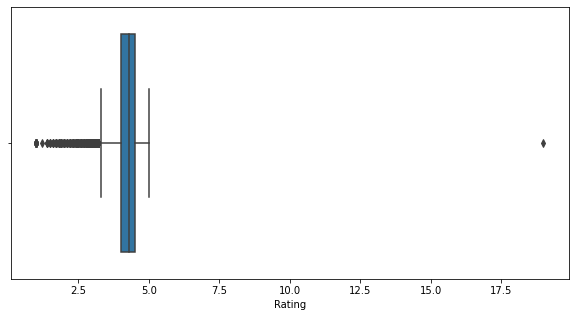

In [70]:
#Creating a box graph for the rating column
plt.figure(figsize = (10,5))
sns.boxplot(df_app['Rating'], x='Rating')


*We can clearly see that there is atleast one value greater that 5, we will check if there are others using a simple code.*

In [71]:
df_app[df_app['Rating'] > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


*Only a single row has the rating of above 5. We will drop the particular row:*

In [72]:
df_app.drop([10472], inplace=True)

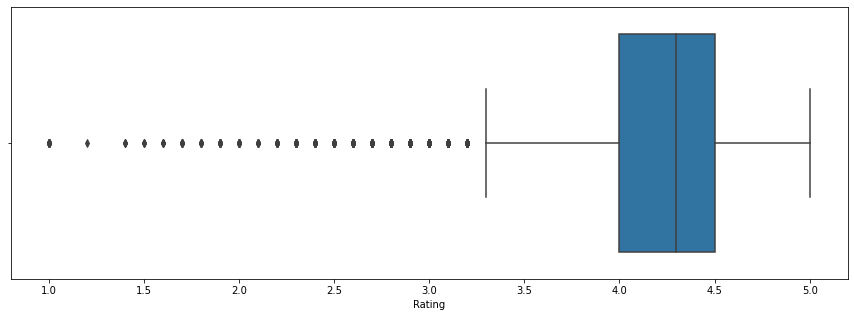

In [73]:
#Lets do the same box plot again:

plt.figure(figsize = (15,5))
sns.boxplot(df_app['Rating'], x='Rating')


*That's better! Now the range of rating is between 1-5*


*Now we need to treat the NaN values. Higest number of the NaN values were in the Rating column we cannot drop so many values lets se if we can replace them in any way*

In [74]:
#lets see the describe() for the rating column:
df_app['Rating'].isnull().sum()

1474

*As we can see there is 1474 Null values we cannot drop them we need to replace them best way would be to replace them with the mean or median value of the set.*


*Let's compare:*

In [75]:
df_app['Rating'].describe()

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [76]:
df_app['Rating'].fillna(df_app['Rating'].median()).describe() #replacing using median()

count    10840.000000
mean         4.206476
std          0.480342
min          1.000000
25%          4.100000
50%          4.300000
75%          4.500000
max          5.000000
Name: Rating, dtype: float64

In [77]:
df_app['Rating'].fillna(df_app['Rating'].mean()).describe() #replacing using mean()

count    10840.000000
mean         4.191757
std          0.478907
min          1.000000
25%          4.100000
50%          4.200000
75%          4.500000
max          5.000000
Name: Rating, dtype: float64

*Using Median() gives us a closer result to the original* 

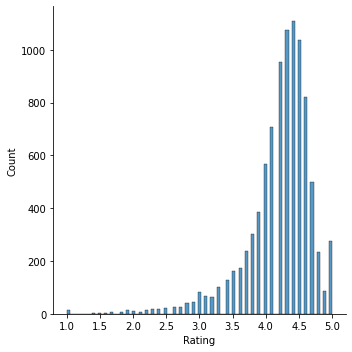

In [79]:
sns.displot(df_app['Rating'])

*Plus we can see from the above distplot appears skewed to left. 
So the median is usually preferred in measures of central tendency when your data set is skewed*



*Replacing using median is a better option by comparision so lets do that!*

In [80]:
df_app['Rating'].fillna(df_app['Rating'].median(), inplace=True)
df_app.describe()

,Rating
count,10840.000000
mean,4.206476
std,0.480342
min,1.000000
25%,4.100000
50%,4.300000
75%,4.500000
max,5.000000


In [81]:
df_app['Rating'].isnull().sum()

0

In [82]:
#Checking the null values for other columns:
df_app.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

*Very few rows have null values so we can drop these!*

In [83]:
df_app = df_app.dropna()

In [84]:
df_app.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

*Now that there are no null values lets do some other data cleaning!*



*Lets start with reviews column*


In [85]:
df_app.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [86]:
df_app['Reviews'].describe()

count     10829
unique     5999
top           0
freq        594
Name: Reviews, dtype: object

In [87]:
#Lets change the type of the Reviews.Int type is the best option.

df_app['Reviews'] = df_app['Reviews'].astype('int')
df_app['Reviews'].head()

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: int64

*Nothing more needs to be done in the review column. Lets move on to the size column.*

In [88]:
df_app['Size'].describe()

count                  10829
unique                   457
top       Varies with device
freq                    1694
Name: Size, dtype: object

In [89]:
df_app['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.7M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

*We can use almost all the data here, except the observation that is 'Varies with device'.
Lets check the total number of that observation.*

In [90]:
df_app[df_app['Size']=='Varies with device'].count()

App               1694
Category          1694
Rating            1694
Reviews           1694
Size              1694
Installs          1694
Type              1694
Price             1694
Content Rating    1694
Genres            1694
Last Updated      1694
Current Ver       1694
Android Ver       1694
dtype: int64

*A total of 1694 rows, we cannot drop so many rows lets just change those values to N/A*

*And use lambda function to convert Strings of different MB and KB to Float type MB*

In [91]:
df_app['Size'] = df_app['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
df_app['Size'] = df_app['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
df_app['Size'] = df_app['Size'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else x)
df_app['Size'] = df_app['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1024 if 'k' in str(x) else x) # 1 MB is equal to 1024 KB
df_app['Size'] = df_app['Size'].apply(lambda x: str(x).replace('+','') if '+' in str(x) else x)
df_app['Size'] = df_app['Size'].astype('float')

In [92]:
df_app['Size'].describe()

count    9135.000000
mean       21.534596
std        22.593997
min         0.008301
25%         4.900000
50%        13.000000
75%        30.000000
max       100.000000
Name: Size, dtype: float64

In [93]:
#Lets check price column
df_app['Price'].describe()

count     10829
unique       92
top           0
freq      10032
Name: Price, dtype: object

In [94]:
df_app['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

*There are $ symbols in the price column and those must be removed*








In [95]:
df_app['Price'] = df_app['Price'].apply(lambda x: str(x).replace('$','') if '$' in str(x) else x)
df_app['Price'] = df_app['Price'].apply(lambda x: str(x).replace(' ','') if ' ' in str(x) else x)
df_app['Price'] = df_app['Price'].astype('float')

In [96]:
df_app['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

*We should remove the Plus symbol from the Installs as well!*

In [342]:
df_app['Installs'] = df_app['Installs'].apply(lambda x: str(x).replace('Free', 'NaN') if 'Free' in str(x) else x)
df_app['Installs'] = df_app['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else x)
df_app['Installs'] = df_app['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else x)
df_app['Installs'] = df_app['Installs'].apply(lambda x: float(x))

*We are almost done with the cleaning lets see if there are any duplicate values.*

In [97]:
df_app['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
Candy Crush Saga                                      7
8 Ball Pool                                           7
ESPN                                                  7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9648, dtype: int64

*We can see that there are some apps for which there are multiple observations.Lets start with the one called ROBLOX*





In [98]:
df_app[df_app['App'] == 'ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67.0,"100,000,000+",Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67.0,"100,000,000+",Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67.0,"100,000,000+",Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67.0,"100,000,000+",Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67.0,"100,000,000+",Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67.0,"100,000,000+",Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67.0,"100,000,000+",Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67.0,"100,000,000+",Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67.0,"100,000,000+",Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


*Almost all the values are same except for the categories. We will keep one from the GAME category and one from the FAMILY category and lets drop the rest*

In [99]:
df_app = df_app.drop_duplicates(['App','Category'])
df_app['App'].value_counts()

Netflix                                          2
LEGO® TV                                         2
DC Super Hero Girls™                             2
Princess Coloring Book                           2
Chess Free                                       2
                                                ..
F-Sim Space Shuttle                              1
Weather Live                                     1
Norwegian For Kids & Babies F                    1
R+F PULSE                                        1
iHoroscope - 2018 Daily Horoscope & Astrology    1
Name: App, Length: 9648, dtype: int64

In [100]:
df_app[df_app['App'] == 'Netflix']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
855,Netflix,ENTERTAINMENT,4.4,5456208,NaN,"100,000,000+",Free,0.0,Teen,Entertainment,"July 31, 2018",Varies with device,Varies with device
3889,Netflix,FAMILY,4.4,5453997,NaN,"100,000,000+",Free,0.0,Teen,Entertainment,"July 31, 2018",Varies with device,Varies with device


*Okay so we can see almost all the duplicate values has been deleted some of the Apps have 2 observation but they are categorized differently so we will keep those!*



*Now lets check out the other Data set!*

#**DATA WRANGLING IN USER REVIEWS.CSV**


In [101]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [102]:
df_review.head(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000
6,10 Best Foods for You,Amazing,Positive,0.60,0.900000
7,10 Best Foods for You,NaN,NaN,NaN,NaN
8,10 Best Foods for You,"Looking forward app,",Neutral,0.00,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.00,0.000000


In [103]:
df_review[1000:1010]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
1000,4K Wallpapers and Ultra HD Backgrounds,NaN,NaN,NaN,NaN
1001,4K Wallpapers and Ultra HD Backgrounds,NaN,NaN,NaN,NaN
1002,4K Wallpapers and Ultra HD Backgrounds,NaN,NaN,NaN,NaN
1003,4K Wallpapers and Ultra HD Backgrounds,NaN,NaN,NaN,NaN
1004,4K Wallpapers and Ultra HD Backgrounds,NaN,NaN,NaN,NaN
1005,4K Wallpapers and Ultra HD Backgrounds,NaN,NaN,NaN,NaN
1006,4K Wallpapers and Ultra HD Backgrounds,NaN,NaN,NaN,NaN
1007,4K Wallpapers and Ultra HD Backgrounds,NaN,NaN,NaN,NaN
1008,4K Wallpapers and Ultra HD Backgrounds,Superb love wallpapers give confidence wheneve...,Positive,0.75,0.8
1009,4K Wallpapers and Ultra HD Backgrounds,NaN,NaN,NaN,NaN


In [104]:
df_review.tail(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64285,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64286,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64287,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64288,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64289,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [105]:
df_review.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

*As we can see here half the data sets have null value we have no option but to drop those*

In [106]:
df_review.dropna(inplace = True)

In [107]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


*All the null values have been dropped. There's nothing more to do here*




*Lets merge the two data sets on the 'App' column and store it in a variable, maybe it will be useful later*  

In [108]:
concat_df = pd.merge(df_review,df_app, on='App', how='outer')
concat_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,HEALTH_AND_FITNESS,4.0,2490.0,3.8,"500,000+",Free,0.0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,HEALTH_AND_FITNESS,4.0,2490.0,3.8,"500,000+",Free,0.0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
2,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,HEALTH_AND_FITNESS,4.0,2490.0,3.8,"500,000+",Free,0.0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
3,10 Best Foods for You,Best idea us,Positive,1.00,0.300000,HEALTH_AND_FITNESS,4.0,2490.0,3.8,"500,000+",Free,0.0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
4,10 Best Foods for You,Best way,Positive,1.00,0.300000,HEALTH_AND_FITNESS,4.0,2490.0,3.8,"500,000+",Free,0.0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up


*Great! Now that we are done with the Data cleaning lets move on to visualization!*

#**ANALYSIS AND VISUALIZATION:**

Text(0.5, 1.0, 'Category Vs Count Plot')

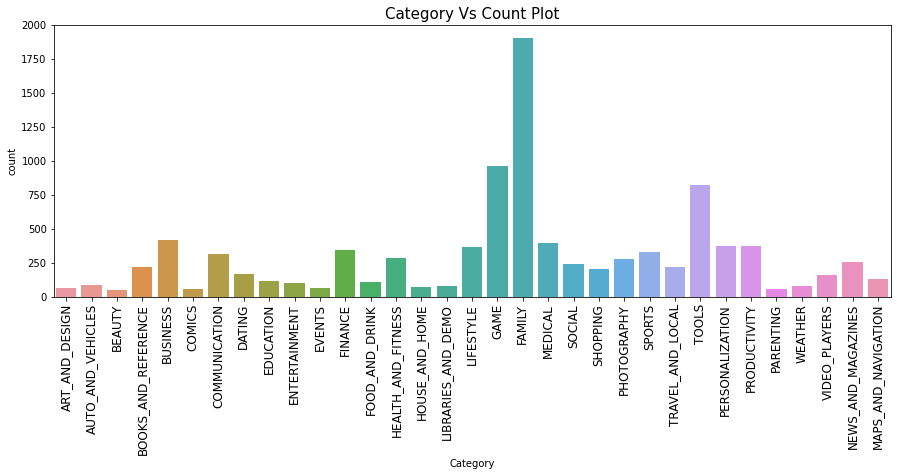

In [187]:
#Let's See which category has the MAX number of Apps in the Playstore
plt.figure(figsize=(15,5))
plt.xticks(rotation = 90, fontsize=12)
sns.countplot(df_app['Category'])
plt.title('Category Vs Count Plot',fontsize =15)


*The category 'Family' has the most number of apps availabe followed by 'Games' and 'Tools' category*





In [227]:
f = round(len(df_app[df_app['Category'] == 'FAMILY'])/ len(df_app['Category'])*100,2)
t = round(len(df_app[df_app['Category'] == 'TOOLS'])/ len(df_app['Category'])*100,2)
g = round(len(df_app[df_app['Category'] == 'GAME'])/ len(df_app['Category'])*100,2)
print("INFERENCE: \n")
print(f'The Playstore app category is dominated by the Family category and it is almost {f}% of the total percentage.')
print(f'Follwed by Games and then Tools category which is almost half consisting of {g}% and {t}% of the total percentage respectively.')

INFERENCE: 

The Playstore app category is dominated by the Family category and it is almost 19.57% of the total percentage.
Follwed by Games and then Tools category which is almost half consisting of 9.86% and 8.5% of the total percentage respectively.


Text(0.5, 1.0, 'Installs per Category')

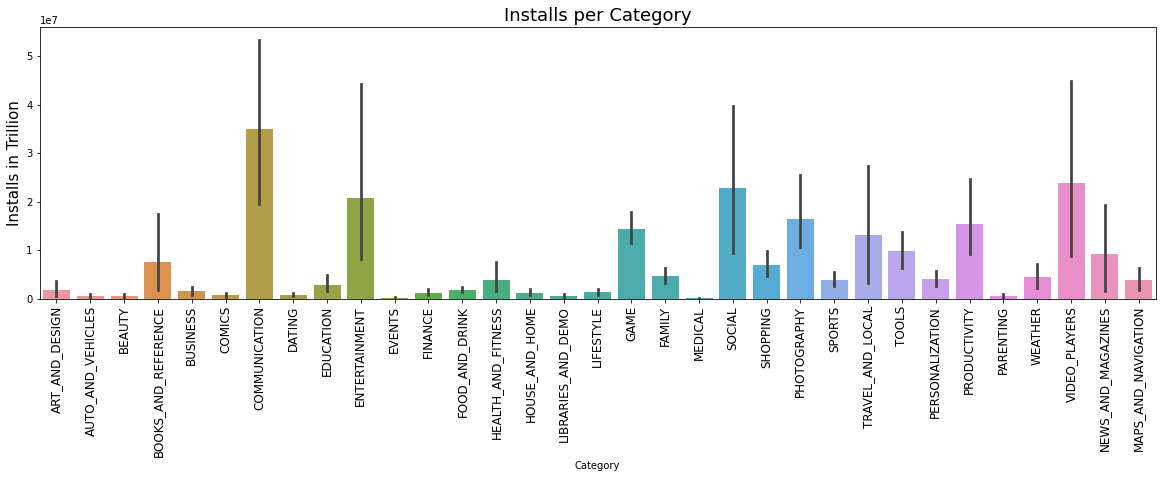

In [352]:
#Let's Check which category has the Highest Installs:
plt.figure(figsize=(20,5))
sns.barplot(x=df_app['Category'], y= df_app['Installs'])
plt.xticks(rotation = 90, fontsize=12)
plt.ylabel('Installs in Trillion',fontsize = 15)
plt.title('Installs per Category',fontsize = 18)

*The highest installed category of Playstore apps are COMMUNICATION followed by SOCIAL , VIDEO_PLAYER and ENTERTAINMENT respectively* 

In [368]:
ci = df_app.groupby('Category')['Installs'].sum()['COMMUNICATION']
ti = df_app['Installs'].sum()
cip = round(ci/ti*100,2)
print('INFERENCE: \n')
print(f"The Category with the highest installs is COMMUNICATION which is {cip}% of all installs")

INFERENCE: 

The Category with the highest installs is COMMUNICATION which is 13.81% of all installs


Text(0.5, 1.0, 'Rating')

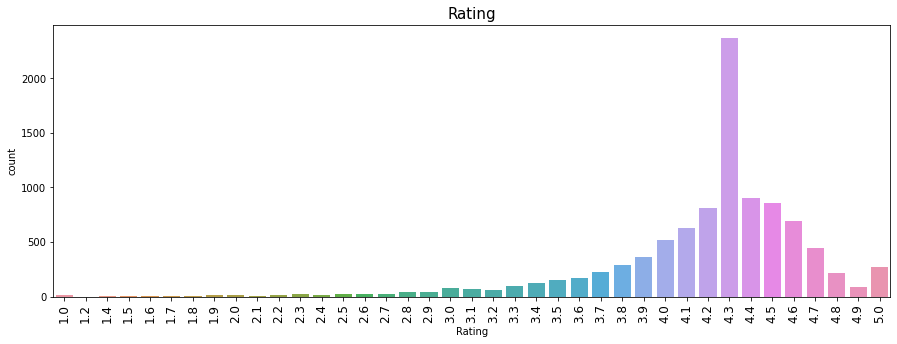

In [131]:
#Lets plot the count of Ratings:
plt.figure(figsize=(15,5))
plt.xticks(rotation = 90, fontsize=12)
sns.countplot(df_app['Rating'])
plt.title("Rating",fontsize = 15)

*Here we can see the 4.3 Rating is enormously high that is because we replaced all the NaN values in 'Ratings' column with the median value it.* 

In [228]:
rat_mean = round(df_app['Rating'].mean(),2)
print('INFERENCE:  \n')
print(f"The average Rating for the apps Playstore is {rat_mean}.")

INFERENCE:  

The average Rating for the apps Playstore is 4.19.


In [179]:
#Lets check the top  ten Apps which has been the most reviewed
df_app[['Reviews', 'App']].sort_values('Reviews', ascending=False).head(10)


,Reviews,App
2544,78158306,Facebook
336,69119316,WhatsApp Messenger
2545,66577313,Instagram
335,56642847,Messenger – Text and Video Chat for Free
1670,44891723,Clash of Clans
3986,44881447,Clash of Clans
4005,42916526,Clean Master- Space Cleaner & Antivirus
1654,27722264,Subway Surfers
3665,25655305,YouTube
7536,24900999,"Security Master - Antivirus, VPN, AppLock, Boo..."


In [229]:
revt =df_app['Reviews'].sum()
revf = df_app['Reviews'].max()
revp = round(revf/revt * 100,2)
print(f'INFERENCE: \n')
print(f'The highest reviewed app is Facebook with a total of {revf} reviews which is {revp}% of total reviews.')

INFERENCE: 

The highest reviewed app is Facebook with a total of 78158306 reviews which is 3.37% of total reviews.


In [186]:
#Let's check the Category of the Apps:
df_app[['Reviews', 'App','Category']].sort_values('Reviews', ascending=False).head(10)

,Reviews,App,Category
2544,78158306,Facebook,SOCIAL
336,69119316,WhatsApp Messenger,COMMUNICATION
2545,66577313,Instagram,SOCIAL
335,56642847,Messenger – Text and Video Chat for Free,COMMUNICATION
1670,44891723,Clash of Clans,GAME
3986,44881447,Clash of Clans,FAMILY
4005,42916526,Clean Master- Space Cleaner & Antivirus,TOOLS
1654,27722264,Subway Surfers,GAME
3665,25655305,YouTube,VIDEO_PLAYERS
7536,24900999,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS


*The top four reviewed apps belongs to the category of Social Media and Comunication.*

Text(0.5, 1.0, 'Size distribution in Apps')

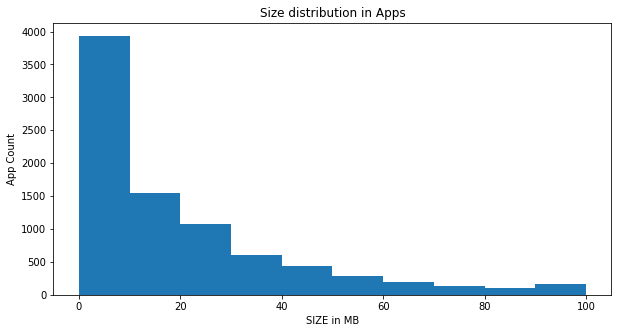

In [219]:
#Lets see the Average size of apps in Playstore:
df_app['Size'].plot(kind = 'hist',figsize=(10, 5))
plt.xlabel("SIZE in MB")
plt.ylabel("App Count")
plt.title("Size distribution in Apps")

In [270]:
print(f'INFERENCE: \n')
print("Most of the app have the size between 0MB - 40MB in the playstore.")
sa = round(df_app['Size'].mean(),2)
print(f"The average size of apps in Playstore is {sa}.")
pas1 = round(((len(df_app[(df_app['Size'] < 40.0)])/len(df_app['Size']))*100), 2)
pas2 = round(((len(df_app[(df_app['Size'] < 20.0)])/len(df_app['Size']))*100), 2)
print(f"{pas1}% of the apps are smaller in size than 40MB.")
print(f"{pas2}% of the apps are smaller in size than 20MB.")

INFERENCE: 

Most of the app have the size between 0MB - 40MB in the playstore.
The average size of apps in Playstore is 20.54.
72.92% of the apps are smaller in size than 40MB.
54.99% of the apps are smaller in size than 20MB.


Text(0.5, 1.0, 'Price Range')

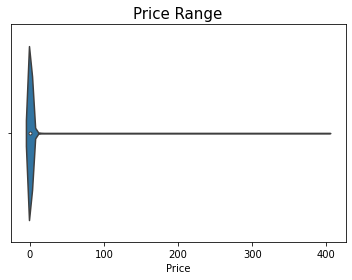

In [254]:
#Lets see the Average price of Apps:

sns.violinplot(df_app['Price'])
plt.title('Price Range',fontsize=15 )


*Most of the price is between 0-5 USD but it seems like some apps have a price as High as 400 USD , lets compare the amount of free apps vs amount of paid apps*

Text(0.5, 0, 'Type(Free/Paid)')

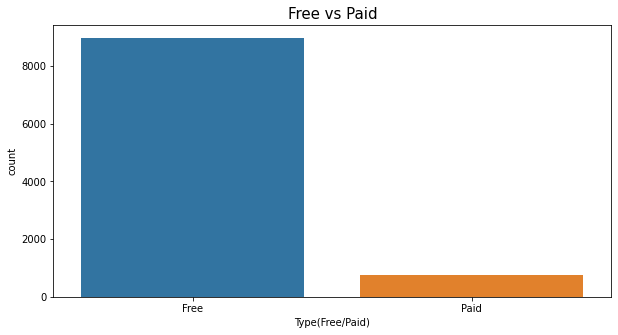

In [255]:
#Let's compare the free vs Paid app:
plt.figure(figsize=(10,5))
sns.countplot(df_app['Type'])

plt.title('Free vs Paid',fontsize=15)
plt.xlabel('Type(Free/Paid)')


In [286]:
aa = df_app['Type'].count()
fa = df_app['Type'][df_app['Type'] == "Free"].count() 
pfa = round(fa/aa*100,2)
print("INFERENCE: \n")
print(f"Around {pfa}% apps in the Playstore is free")
o1 = round(((len(df_app[(df_app['Price'] > 4.99)])/len(df_app['Size']))*100), 2)
print(f"Only {o1}% app are 5$ or more")
print("I'm Rich - Trump Edition is by Far the most expensive app which costs around 400$")
df_app[['App','Price']].sort_values('Price', ascending=False).head(1)

INFERENCE: 

Around 92.24% apps in the Playstore is free
Only 1.65% app are 5$ or more
I'm Rich - Trump Edition is by Far the most expensive app which costs around 400$


,App,Price
4367,I'm Rich - Trump Edition,400.0


Text(0.5, 1.0, 'Content Rating vs App Count')

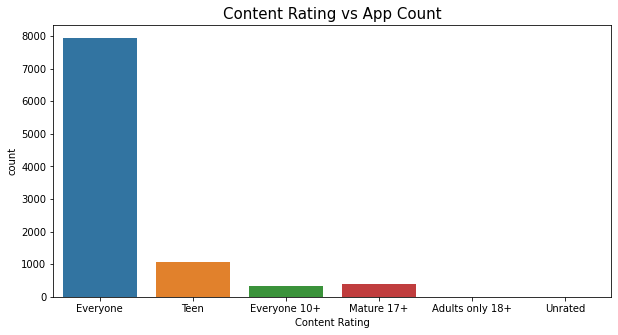

In [293]:
#Let's Check the content rating across all apps:
plt.figure(figsize=(10,5))
sns.countplot(df_app['Content Rating'])
plt.title("Content Rating vs App Count",fontsize = 15)

*Most of the content is for everyone!*

In [301]:
ec = df_app['App'][df_app['Content Rating'] == 'Everyone'].count()
ac = df_app['Content Rating'].count()
tc = df_app['App'][df_app['Content Rating'] == 'Teen'].count()

ep = round(ec/ac*100,2)
tp = round(tc/ac*100,2)
print("INFERENCE: \n")
print(f"Around {ep}% content in playstore is for eveyone")
print(f"{tp}% content in playstore is for teens")

INFERENCE: 

Around 81.61% content in playstore is for eveyone
10.86% content in playstore is for teens


Text(0.5, 1.0, 'Android Version vs No. of user')

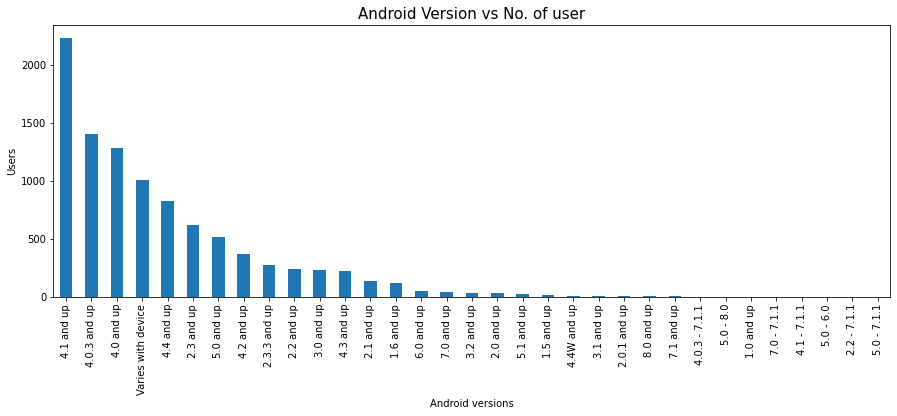

In [316]:
plt.figure(figsize= (15,5))
df_app['Android Ver'].value_counts().plot.bar()
plt.ylabel('Users')
plt.xlabel('Android versions')
plt.title('Android Version vs No. of user', fontsize = 15)

In [324]:
print('INFERENCE: \n')
print('The top three Android Versions used today are:')
print(df_app['Android Ver'].value_counts().head(3))

INFERENCE: 

The top three Android Versions used today are:
4.1 and up      2234
4.0.3 and up    1404
4.0 and up      1288
Name: Android Ver, dtype: int64


Text(0.5, 1.0, 'Sentiment Distribution')

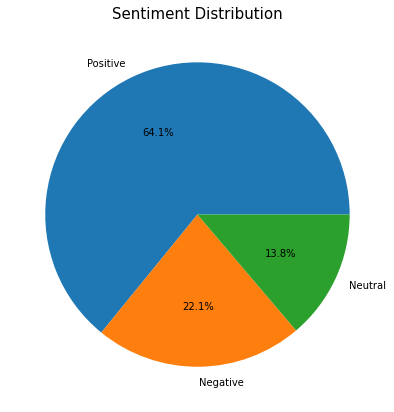

In [310]:
#Let's Check the user sentiments:

pst = round(((len(df_review[df_review['Sentiment'] == 'Positive'])/len(df_review['Sentiment']))*100), 2)
ngt = round(((len(df_review[df_review['Sentiment'] == 'Negative'])/len(df_review['Sentiment']))*100), 2)
net = round(((len(df_review[df_review['Sentiment'] == 'Neutral'])/len(df_review['Sentiment']))*100), 2)
sentiments = [pst, ngt, net]

plt.figure(figsize=(7,7))
plt.pie(sentiments, labels=['Positive', 'Negative', 'Neutral'],autopct='%1.1f%%' )
plt.title('Sentiment Distribution',fontsize = 15, )

*We can se that 64% of the expressed sentiments are positive*


*22% is Negetive and 14% is Neutral*